Source : https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# İmport Libraries

import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
https://tensorflow.org/images/fashion-mnist-sprite.png

In [2]:
#IMPORT FASHION MNIST DATASET
fashion_mnist = tf.keras.datasets.fashion_mnist
# train ve test seti olarak bölünmüş bir halde indiriyoruz
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Görüntüler pixel değerleri 0-255 arasında ve 28x28 boyutları
# train-test setleri numpy dizileri döndürür
# Labellar 0 ila 9 arasında değerleri alır

In [4]:
# 0 ile 9 arasındaki sayılara karşılık gelen giyecekleri daha saonrası için etiket belirleyelim
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# boyutlar
print("Train İmages Shape:",train_images.shape)
print("Train LAbels Shape:",train_labels.shape)

print("Test İmages Shape:",test_images.shape)
print("Test Labels Shape:",test_labels.shape)

Train İmages Shape: (60000, 28, 28)
Train LAbels Shape: (60000,)
Test İmages Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [6]:
# Uzunluklar
print("Train İmages Len:",len(train_images))
print("Train Labels Len:",len(train_labels))
print("Test İmages Len:",len(test_images))
print("Test Labels Len:",len(test_labels))

Train İmages Len: 60000
Train Labels Len: 60000
Test İmages Len: 10000
Test Labels Len: 10000


In [7]:
# Preprocessing Data
# İlk görüntümüzü görselleştirelim
# Matris olarak : 0-255 değerleri arasında
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

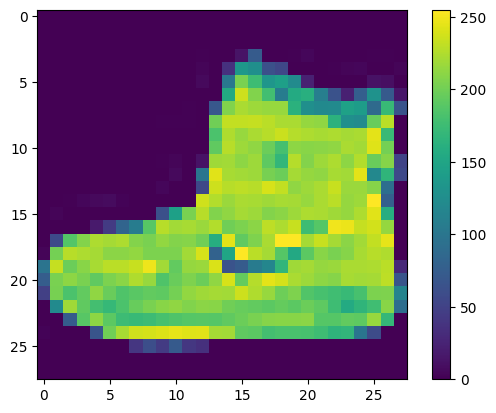

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Modele göndermeden önce işleyelim
# 0-255 olan değerleri 0-1 aralağına oranlayalum
# Bütün değerleri 255 e bölelim
train_images = train_images/255
test_images = test_images/255

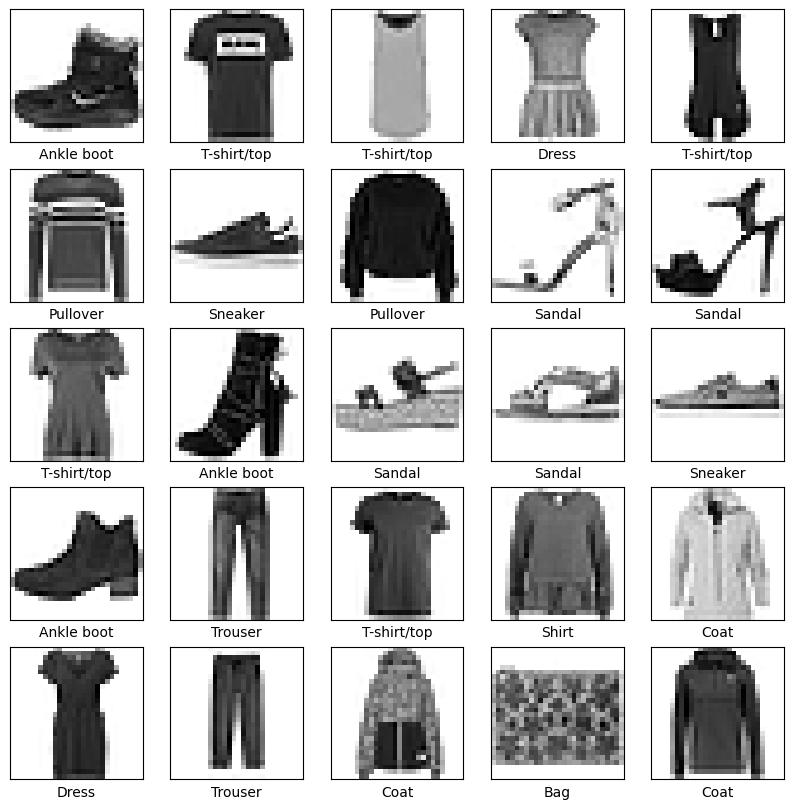

In [22]:
# ilk 25 resme bakalım
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# MODEL OLUŞTURMA
### 1-Model Kur    2- Katmanlarını yapılandır  3- Modeli derle

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),  # 2 boyuttan tek boyuta indirir 28*28 = 784 pixel
    tf.keras.layers.Dense(128,activation = "relu" ),  # 128 nöron oluşturulur
    tf.keras.layers.Dense(10)  # Her nöron 10 kategoriden birine ait olduğunu gösteren bir sayı belirtir
])

In [12]:
# Modeli Derleme

# loss : bir modelin eğitim sırasında ne kadar doğru ölçtüğünü hesaplar /// gerçek veri - tahmin
# optimizer = Modelin gördüğü ve kayıp verilerine göre nasıl günceelendiğidir
# metrics = eğitim ve test adımlarını takip eder
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [13]:
# MODEL EĞİTİMİ
# model görüntülerle etiketleri eşleştirmeyi öğrenir
# Daha sonra test verilerini kullanarak tahmin yapılacak
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.5028 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3780 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3144 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2816 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2614 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2487 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.24

Model eğitim verilerinde %91 doğruluk oranıyla çalışır

In [14]:
#Test verisiyle performansına bakalım
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print("\nTest Accuracy :",test_acc)

313/313 - 1s - loss: 0.3263 - accuracy: 0.8849 - 600ms/epoch - 2ms/step

Test Accuracy : 0.8848999738693237


In [15]:
"""Test veri kümesindeki doğruluğun, eğitim veri
kümesindeki doğruluktan biraz daha az olduğu ortaya çıkmıştır.
Eğitim doğruluğu ile test doğruluğu arasındaki bu fark aşırı uyumu temsil eder.
Aşırı uyum, bir makine öğrenimi modeli yeni, daha önce görülmemiş girdiler üzerinde
 eğitim verilerinde olduğundan daha kötü performans gösterdiğinde gerçekleşir.
 Aşırı uyarlanmış bir model, eğitim veri kümesindeki gürültü ve ayrıntıları,
 modelin yeni verilerdeki performansını olumsuz etkileyecek bir noktaya kadar “ezberler”.

"""

'Test veri kümesindeki doğruluğun, eğitim veri\nkümesindeki doğruluktan biraz daha az olduğu ortaya çıkmıştır.\nEğitim doğruluğu ile test doğruluğu arasındaki bu fark aşırı uyumu temsil eder.\nAşırı uyum, bir makine öğrenimi modeli yeni, daha önce görülmemiş girdiler üzerinde\n eğitim verilerinde olduğundan daha kötü performans gösterdiğinde gerçekleşir.\n Aşırı uyarlanmış bir model, eğitim veri kümesindeki gürültü ve ayrıntıları,\n modelin yeni verilerdeki performansını olumsuz etkileyecek bir noktaya kadar “ezberler”.\n\n'

In [16]:
#Model eğitildikten sonra, bazı görüntüler hakkında tahminler yapmak için kullanabiliriz.
#Modelin doğrusal çıktılarını (logitler) yorumlaması daha kolay olan olasılıklara dönüştürmek için bir softmax katmanı ekleyelim.

probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [18]:
# Test setindeki her görüntü için tahmin yaptı
# inceleyelim
predictions[0]

array([1.0190018e-06, 4.0419564e-11, 2.0190384e-08, 6.7624795e-09,
       4.9518882e-09, 4.5201380e-04, 7.5575180e-08, 5.4363096e-03,
       9.4226309e-08, 9.9411047e-01], dtype=float32)

Burdaki mantık 10 kategori için bir değer üretmiştir.
Hangi etiketin ne kadar değer aldığı görünmektedir

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

Görüldüğü üzere tahmin ve gerçek değer uyuşuyor

In [26]:
# Görselleştirmek ve tahmin için bir fonksiyon yazalım
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


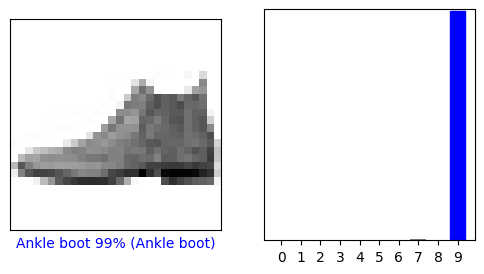

In [27]:
# Modeli deneyelim
# Doğru tahminler Mavi---------Yanlış Tahminler Kırmızı
# DEğerlendirme yüzde olarak ifade edilecek

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

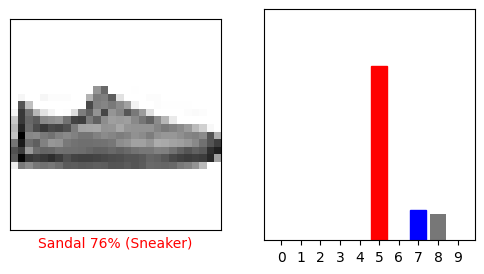

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

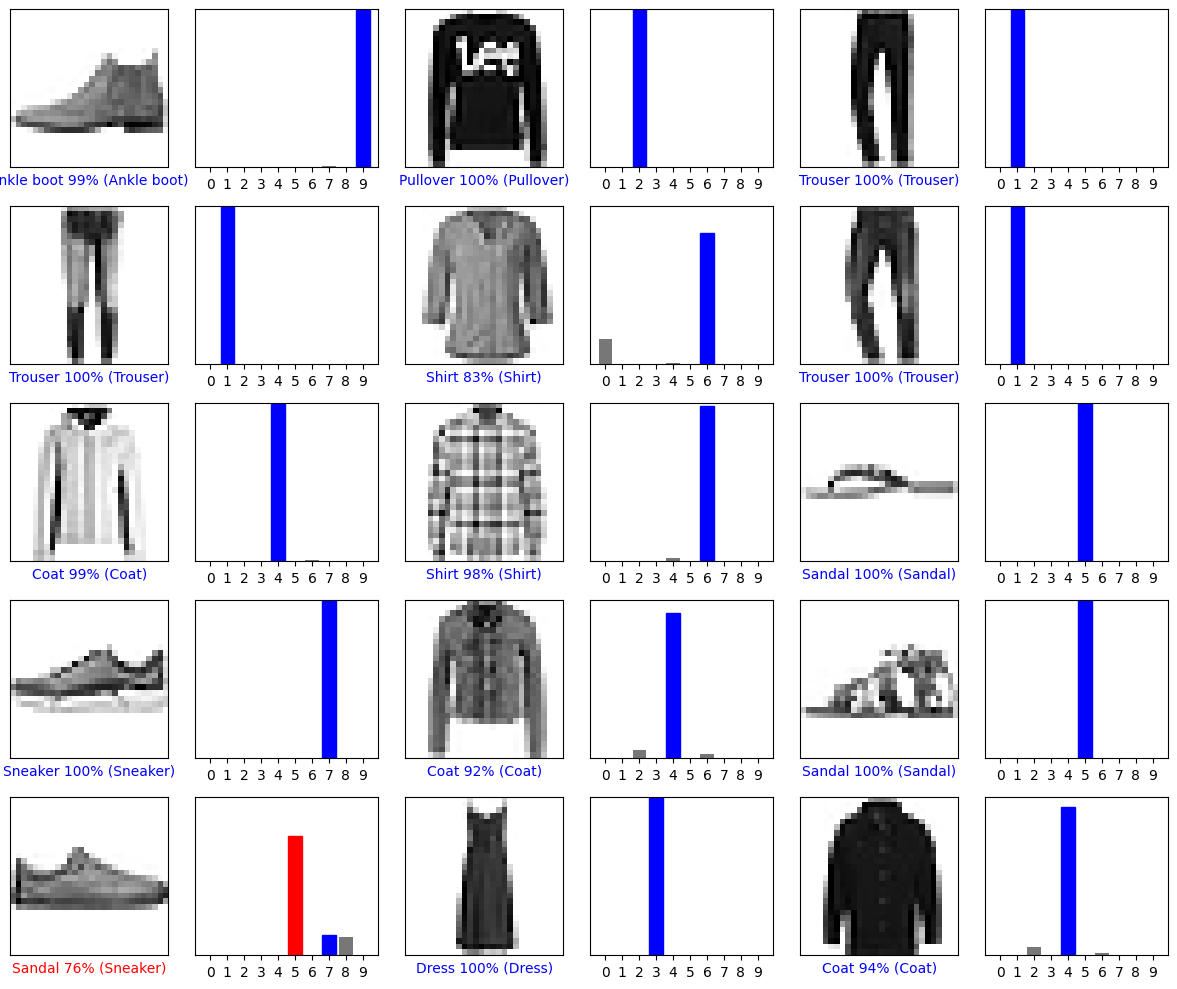

In [29]:
# Toplu tahminlere bakalım
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize = (2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [30]:
# TEK BİR GÖRÜNTÜ HAKKINDA TAHMİN YAPTIRALIM

img = test_images[1]
img.shape

(28, 28)

In [31]:
# tf.keras modelleri yığın ve koleksiyon tahminleri yapmak için kullanıldığından bir tek görüntüyü listeye eklememiz gerekir
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [33]:
# tahmin yapalım
predictions_single_img = probability_model.predict(img)
print(predictions_single_img)

1/1 [==============================] - 0s 47ms/step
[[1.0719053e-04 1.6947531e-13 9.9903893e-01 1.7470773e-09 7.6146773e-04
  6.6149614e-14 9.2413618e-05 8.8803701e-19 6.0981780e-09 3.9996770e-14]]


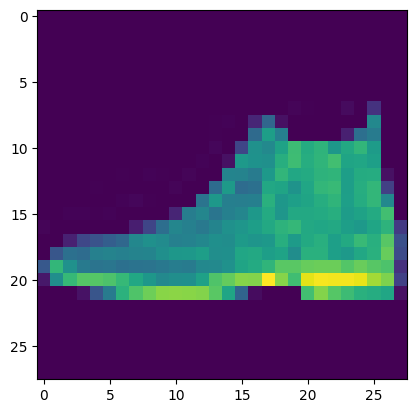

In [43]:
plt.figure()
plt.imshow(test_images[0])


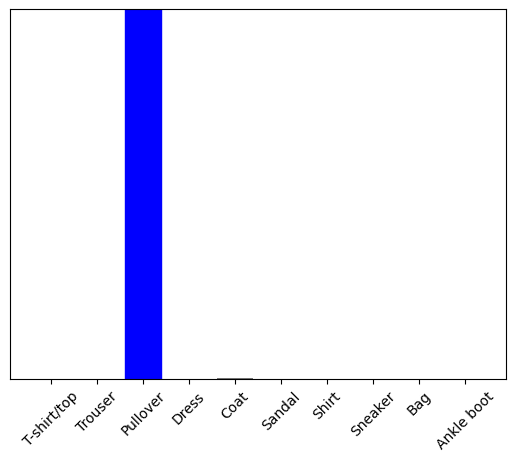

In [35]:
plot_value_array(1,predictions_single_img[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation = 45)
plt.show()

In [44]:
# Sonuç
np.argmax(predictions_single_img[0])

2